# Loading the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Machine Learning\EDA on Mobile data\mobile_data.csv")
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            961     1          1.4         1   0       1          57    0.6   
1           1218     1          2.8         1   3       0          39    0.8   
2            576     1          2.8         0   2       1          10    0.2   
3           1523     1          1.8         0   6       1          11    0.1   
4           1403     1          2.5         1   3       0          62    0.9   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        114        8   3        291      1434  2782    18     9          7   
1        150        7  14       1122      1746  1667    10     0         12   
2        184        5   7        513      1438  2938     6     0          5   
3        129        1   8        148      1606   707    19     8         19   
4         90        4  13        217      1623   921    14    13         18   

   three_g  touch_screen  wifi  price_range  
0        1             1     1            2  
1        0             0     0            1  
2        1             1     1            2  
3        1             1     0            0  
4        1             0     0            0

In [3]:
df.shape

(1400, 21)

In [4]:
df.price_range.value_counts()

2    351
1    350
0    350
3    349
Name: price_range, dtype: int64

# Will do feature engineering by using krish nayak method

In [5]:
# First will split the data to predictors and target variable

X=df.loc[:,df.columns!='price_range']
y=df.loc[:,df.columns=='price_range']

# Based on the feature i want to predict on which price range the mobile going to belong  

-- where 
- 0 - lower range mobile
- 1 - mid medium range mobile
- 2 - medium range mobile
- 3 - high range mobile -->

In [6]:
# it is just like a classification problem

# we have 20 features over here we want to select only the best feature 
# in the curse of dimension if i increase the number of feature after perticular threshold value the accrucy of the model will decrease 

# so to overcome will use univariate selection  in this will select the library called selectKBest library

In [7]:
# Apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures=SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

## after fit i will get 2 feature 
- 1) fit.scores_

In [8]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(X.columns)

In [9]:
# concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']     # naming the dataframe columns

In [10]:
featureScores.sort_values('Score',ascending=False)

Specs          Score
13            ram  659651.379564
11      px_height   10623.095969
0   battery_power    9677.800779
12       px_width    6567.182038
6      int_memory      91.751050
8       mobile_wt      63.823236
16      talk_time      19.786126
10             pc      13.831897
14           sc_h      11.364740
4              fc      11.056676
15           sc_w      10.476490
9         n_cores       4.018889
1            blue       2.783310
18   touch_screen       1.833243
5          four_g       1.165191
19           wifi       1.090816
3        dual_sim       0.954202
7           m_dep       0.799920
17        three_g       0.728721
2     clock_speed       0.415403

In [12]:
# will print the 11 largest importance feature  will consider the 2 digit number
print(featureScores.nlargest(11,'Score'))

            Specs          Score
13            ram  659651.379564
11      px_height   10623.095969
0   battery_power    9677.800779
12       px_width    6567.182038
6      int_memory      91.751050
8       mobile_wt      63.823236
16      talk_time      19.786126
10             pc      13.831897
14           sc_h      11.364740
4              fc      11.056676
15           sc_w      10.476490


In [13]:
# will perform different technique now 
# will use feature importance method now to select the best feature

# Feature Importance

In [14]:
from sklearn.ensemble import ExtraTreesClassifier       # will use ExtraTreeClassifier to select the top feature
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

[0.05890208 0.01955885 0.03478614 0.02079017 0.03414658 0.01869304
 0.0359961  0.03517659 0.03739034 0.03518264 0.03487311 0.04787536
 0.04925635 0.3714651  0.03599847 0.036112   0.03764049 0.01511271
 0.02033351 0.02071035]


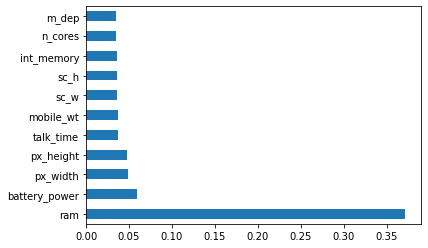

In [16]:
# plot the graph of feature importances for better visualization

feature_importances =pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(11).plot(kind='barh')
plt.show()

In [17]:
feature_importances.nlargest(11)*100

ram              37.146510
battery_power     5.890208
px_width          4.925635
px_height         4.787536
talk_time         3.764049
mobile_wt         3.739034
sc_w              3.611200
sc_h              3.599847
int_memory        3.599610
n_cores           3.518264
m_dep             3.517659
dtype: float64

In [18]:
# we can see in both the technique ram is playing wonderful role which having hight improtance 

In [19]:
feature_importances.nlargest(11).index

Index(['ram', 'battery_power', 'px_width', 'px_height', 'talk_time',
       'mobile_wt', 'sc_w', 'sc_h', 'int_memory', 'n_cores', 'm_dep'],
      dtype='object')

In [20]:
fi=feature_importances.nlargest(11).index

In [21]:
df1=pd.concat([df[fi],df['price_range']],axis=1)

In [22]:
df1.head()

ram  battery_power  px_width  px_height  talk_time  mobile_wt  sc_w  sc_h  \
0  2782            961      1434        291          7        114     9    18   
1  1667           1218      1746       1122         12        150     0    10   
2  2938            576      1438        513          5        184     0     6   
3   707           1523      1606        148         19        129     8    19   
4   921           1403      1623        217         18         90    13    14   

   int_memory  n_cores  m_dep  price_range  
0          57        8    0.6            2  
1          39        7    0.8            1  
2          10        5    0.2            2  
3          11        1    0.1            0  
4          62        4    0.9            0

In [23]:
df1.shape

(1400, 12)

# Very important thing to be considered before using KNN Algorithm

## Now will perform KNN operation 

- 1) If you want to perform the KNN operation the data should be equally divided (the target variable should have equal no of counts) if not will do SMOTE operation
- 2) The data should not be outlier if the data is outlier their is a chance where the model may predict wrongly

# Standardize the Predictors where will keep all the data in the same order   
## standardisation = (x-mean)/standard deviation

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [29]:
scaler.fit(df1.drop('price_range',axis=1))        # here it selects all the data except the target variable 

StandardScaler()

In [31]:
scaled_features=scaler.transform(df1.drop('price_range',axis=1))

In [33]:
df_feat=pd.DataFrame(scaled_features,columns=df1.columns[:-1])        # we are assigning the column name to the data we got in the scaled_reatures
df_feat.head()

ram  battery_power  px_width  px_height  talk_time  mobile_wt  \
0  0.609239      -0.645546  0.420493  -0.796978  -0.731708  -0.745102   
1 -0.413580      -0.050092  1.146621   1.070687   0.186041   0.271606   
2  0.752342      -1.537569  0.429802  -0.298035  -1.098807   1.231831   
3 -1.294214       0.656575  0.820794  -1.118369   1.470889  -0.321474   
4 -1.097906       0.378542  0.860359  -0.963292   1.287339  -1.422908   

       sc_w      sc_h  int_memory   n_cores     m_dep  
0  0.773559  1.372389    1.363134  1.537821  0.314393  
1 -1.309545 -0.514983    0.376519  1.098264  1.006454  
2 -1.309545 -1.458669   -1.213028  0.219150 -1.069728  
3  0.542103  1.608310   -1.158216 -1.539077 -1.415758  
4  1.699383  0.428703    1.637194 -0.220406  1.352484

In [34]:
df1.shape

(1400, 12)

In [35]:
df1.columns

Index(['ram', 'battery_power', 'px_width', 'px_height', 'talk_time',
       'mobile_wt', 'sc_w', 'sc_h', 'int_memory', 'n_cores', 'm_dep',
       'price_range'],
      dtype='object')

In [36]:
# By performing the plot we must consider which algrothium to be used 

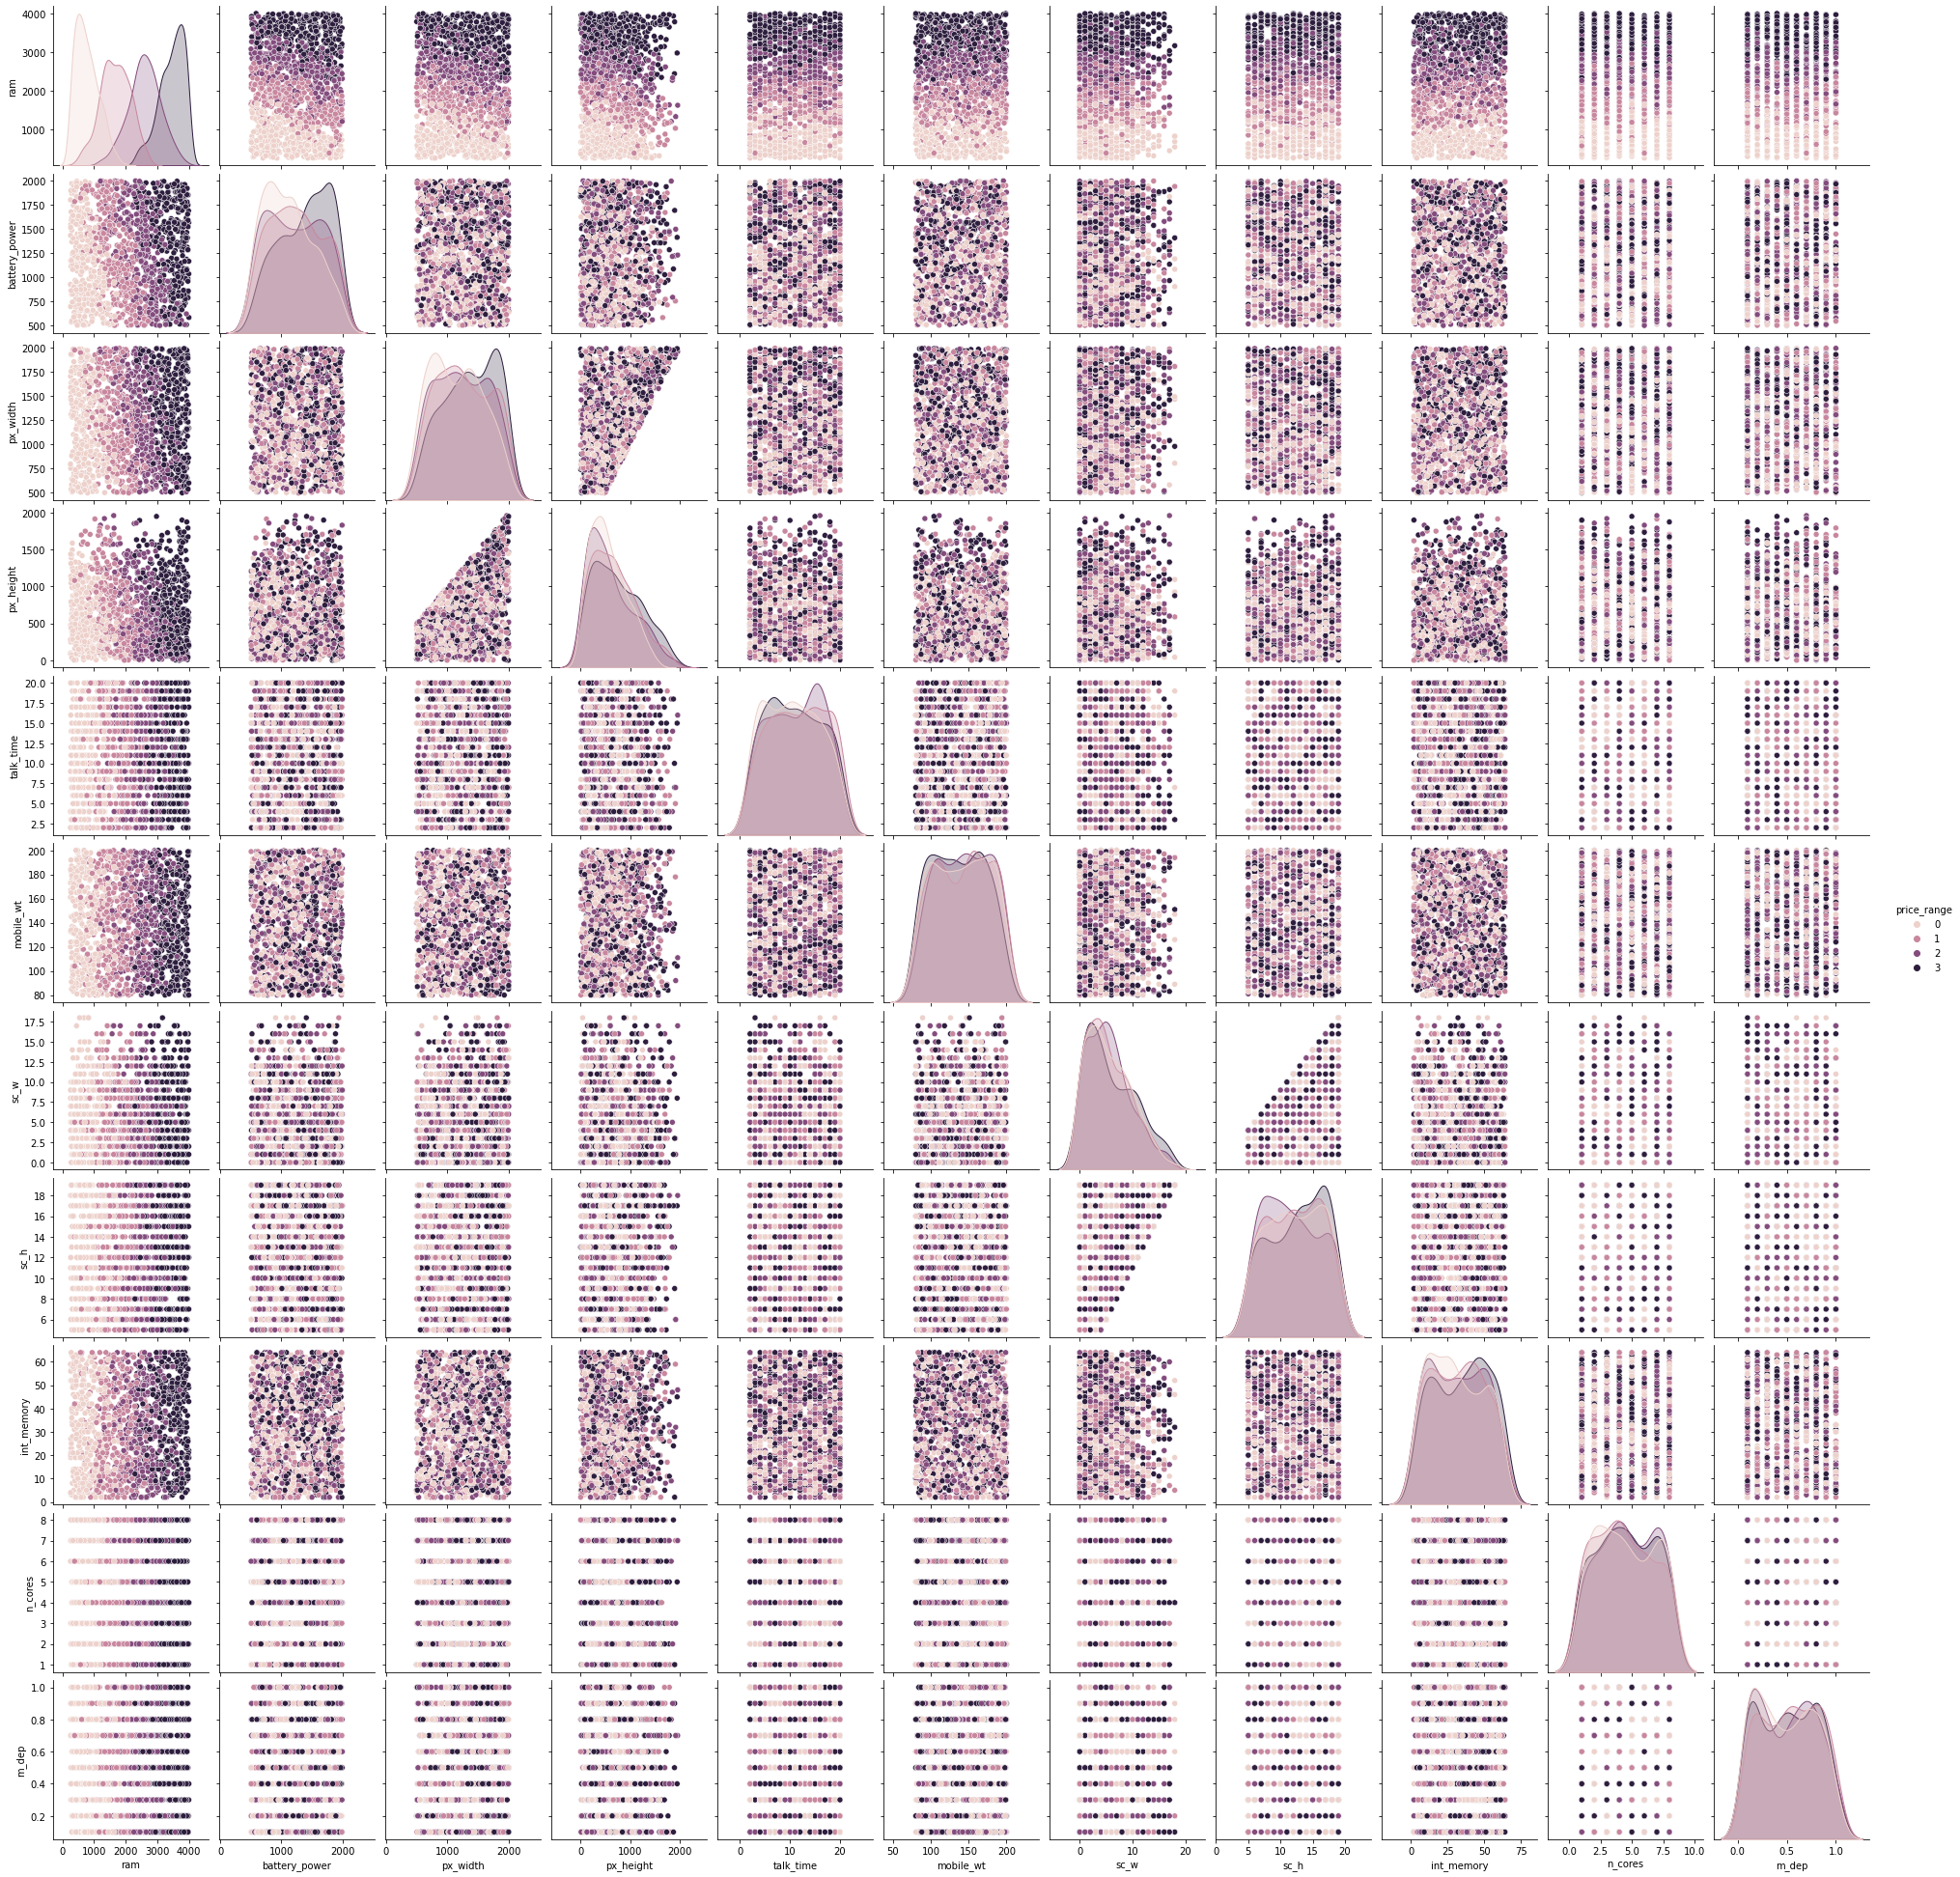

In [37]:
# lets perform pair plot for entire data
sns.pairplot(df1,hue='price_range')

# Train Test Split

In [38]:
X=df1.loc[:,df1.columns!='price_range']
y=df1.loc[:,df1.columns=='price_range']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Using KNN [K-nearest neighbor]

In [40]:
## Remember that we are trying to comeup with a model to predict the actual data where will take n_neighbors as 1 initally to derive the data

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
y_pred=knn.predict(X_test)

# Predictions and Evaluations

### Let's evaluate our KNN model

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [53]:
confusion_matrix(y_test,y_pred)

array([[106,   6,   0,   0],
       [  3,  92,   8,   0],
       [  0,   4,  85,   9],
       [  0,   0,  11,  96]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       112
           1       0.90      0.89      0.90       103
           2       0.82      0.87      0.84        98
           3       0.91      0.90      0.91       107

    accuracy                           0.90       420
   macro avg       0.90      0.90      0.90       420
weighted avg       0.90      0.90      0.90       420



In [55]:
# the data is underfiting because the data is predicting by using only one data (where k=1) and coming for conclusion

# Choosing a K Value

## let's go ahead and use the elbow method to pick a good k-value:

In [56]:
accuracy_rate=[]

for i in range(1,40):    # let use the k-value as 40  by using the 1-40 data points we are making the data to predict 
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['price_range'],cv=10)    # we are performing the 10 different ways or experiment will perform
    accuracy_rate.append(score.mean())

In [57]:
error_rate=[]
for i in range(1,40):    # let use the k-value as 40  by using the 1-40 data points we are making the data to predict 
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['price_range'],cv=10)    # we are performing the 10 different ways or experiment will perform
    error_rate.append(1-score.mean())

Text(0, 0.5, 'accuracy_rate')

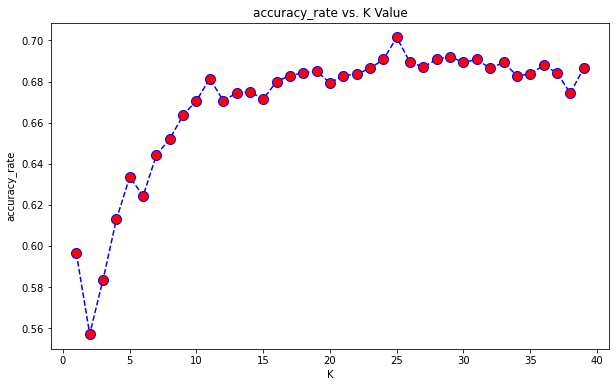

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

Text(0, 0.5, 'Error Rate')

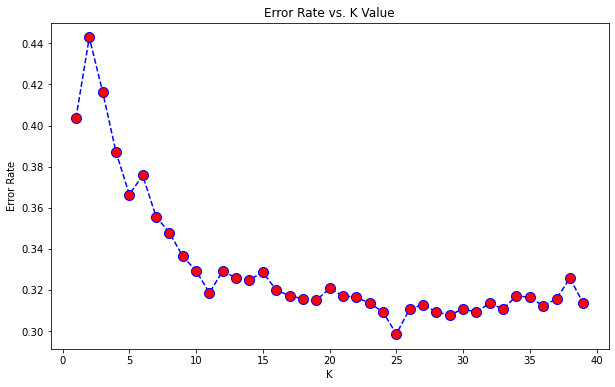

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [76]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[108   4   0   0]
 [  1  98   4   0]
 [  0  10  84   4]
 [  0   0  12  95]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       112
           1       0.88      0.95      0.91       103
           2       0.84      0.86      0.85        98
           3       0.96      0.89      0.92       107

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.91       420
weighted avg       0.92      0.92      0.92       420



In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9023809523809524

In [92]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[108   4   0   0]
 [  1  98   4   0]
 [  0  10  84   4]
 [  0   0  12  95]]


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       112
           1       0.88      0.95      0.91       103
           2       0.84      0.86      0.85        98
           3       0.96      0.89      0.92       107

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.91       420
weighted avg       0.92      0.92      0.92       420



In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9166666666666666